# Ballistic Trajectories

## 1) Basic Equations

$$ 
y(t) = (v_o \sin \theta) t  - 0.5gt^2
$$

$$ 
x(t) = (v_o \cos \theta) t
$$


$$ 
y(x) = (\tan \theta)x - \frac{g}{2(v_o \cos \theta)^2}x^2
$$


Time to reach the initial point in $y_0$:


$$
t_{end} = \frac{2(v_0 \sin \theta)}{g}
$$



$R$ is the horizontal range, and $y_{max}$ is the maximum height, hence: 


$$ 
R = \frac{{v_o}^2}{g}\sin 2 \theta
$$

$$
y_{max} = \frac{{v_o}^2}{2g}(\sin\theta)^2
$$

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")

### Constants

In [2]:
G = 9.8
thrown_ball_vo = 42 # m/s
mortar_vo = 110 # m/s

### Functions

In [3]:
def d2r(theta):
    return math.radians(theta)

def r2d(theta):
    return math.degrees(theta)

def yt(t, theta, vo):
    car = vo*np.sin(d2r(theta))*t
    cdr = 0.5*G*np.power(t,2)
    return car - cdr


def xt(t, theta, vo):
    car = vo*np.cos(d2r(theta))*t
    return car


def y(x, theta, vo):
    car = np.tan(d2r(theta))*x
    num = G*np.power(x,2)
    dem = 2*np.power(vo*np.cos(d2r(theta)),2)
    cdr = num/dem
    return car - cdr


def time2yo(theta, vo):
    num = 2*vo*np.sin(d2r(theta))
    dem = G
    return num/dem


def R(theta, vo):
    car = np.power(vo,2)*np.sin(d2r(2*theta))
    return car/G

def ymax(theta, vo):
    car = np.power(vo,2)*np.power(np.sin(d2r(theta)),2)
    return car/(2*G)


def run_exp(theta, vo, num_t):
    end_t = time2yo(theta=theta, vo=vo)
    R_exp = R(theta=theta, vo=vo)
    ymax_exp = ymax(theta=theta, vo=vo)
    ts = np.linspace(0,end_t,num_t)
    xs = []
    ys = []
    for t in ts:
        x_t = xt(t, theta=theta, vo=vo)
        y_x = y(x_t, theta=theta, vo=vo)
        xs.append(x_t)
        ys.append(y_x)
    obs = np.array([ts,xs,ys]).T
    df = pd.DataFrame(obs, columns=["t", "x", "y"])
    df["t_final"] = end_t
    df["R"] = R_exp
    df["y_max"] = ymax_exp
    return df

### Experiment

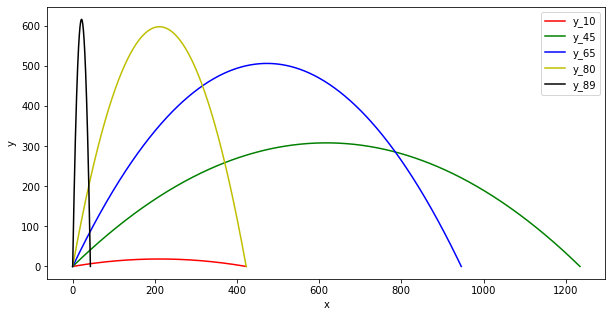

In [4]:
theta1 = 10
theta2 = 45
theta3 = 65
theta4 = 80
theta5 = 89
num_t = 600
v0 = mortar_vo

exp1 = run_exp(theta=theta1, vo=v0, num_t=num_t)
exp2 = run_exp(theta=theta2, vo=v0, num_t=num_t)
exp3 = run_exp(theta=theta3, vo=v0, num_t=num_t)
exp4 = run_exp(theta=theta4, vo=v0, num_t=num_t)
exp5 = run_exp(theta=theta5, vo=v0, num_t=num_t)

thetas = [theta1, theta2, theta3, theta4, theta5]
exps = [exp1, exp2, exp3, exp4, exp5]
colors = ["r", "g", "b", "y", "k"]
figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)

for theta,exp,c in zip(thetas,exps, colors):
    suf = "_{}".format(theta)
    exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color=c);
plt.xlabel('x');
plt.ylabel('y');

In [6]:
20/(2.5*np.cos(d2r(40)))

10.443258314658229

In [9]:
vy = (10.44*np.sin(d2r(40))) - (G*2.5)
vy

-17.78929735487253

In [11]:
10.44325*np.cos(d2r(40))

7.999993630602269

In [12]:
np.sqrt(np.power(8,2) + np.power(vy, 2))

19.50536081132761

In [17]:
r2d(np.arcsin(-17.78929735487253/19.50536081132761))

-65.78614061791575

In [19]:
19.50536081132761* np.sin(d2r(-65.78614061791575))

-17.789297354872534

In [21]:
19.50536081132761* np.cos(d2r(-65.78614061791575))

7.9999999999999964